
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz !wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz


In [174]:
import numpy as np
import matplotlib.pyplot as plt

In [175]:
# ! wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
CHECKPOINT_PATH='./sam_vit_h_4b8939.pth'

In [176]:
import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [177]:
CHECKPOINT_PATH

'./sam_vit_h_4b8939.pth'

In [178]:
MODEL_TYPE

'vit_h'

In [179]:
DEVICE

device(type='cpu')

In [180]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)


mask_generator = SamAutomaticMaskGenerator(sam)

In [684]:
# Import opencv package
# pip3 install opencv-python
import cv2


# Give the path of your image
IMAGE_PATH= './10.jpg'
# Read the image from the path
image= cv2.imread(IMAGE_PATH)
# Convert to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#mage_rgb = cv2.resize(image_rgb, (512, 512))
#image_rgb = image



# Generate segmentation mask
output_mask = mask_generator.generate(image_rgb)
sam_results = output_mask
print(output_mask)

[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]]), 'area': 17528, 'bbox': [0, 89, 239, 150], 'predicted_iou': 1.0129910707473755, 'point_coords': [[213.75, 213.75]], 'stability_score': 0.982422411441803, 'crop_box': [0, 0, 240, 240]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 6401, 'bbox': [144, 0, 71, 105], 'predicted_iou': 0.9984023571014404, 'po

In [685]:
len(sam_results)

40

In [606]:
sam_results[0].keys()


dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])

# Find the Best Image

In [686]:
a = []
for val in sam_results:
    #print((val['predicted_iou']))
    a.append(val['predicted_iou'])
ar = np.array(a)

In [687]:
mask = sam_results[np.argmax(ar)]['segmentation']

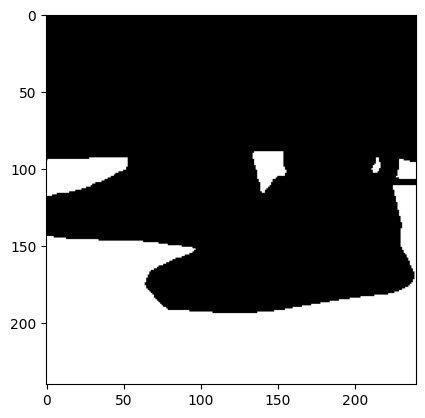

In [688]:
plt.imshow(mask, cmap='gray')


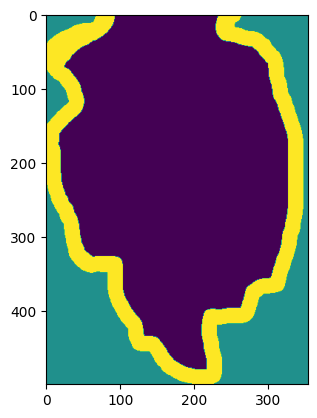

In [202]:
image = plt.imread('pomeranian_98.png')
plt.imshow(image)

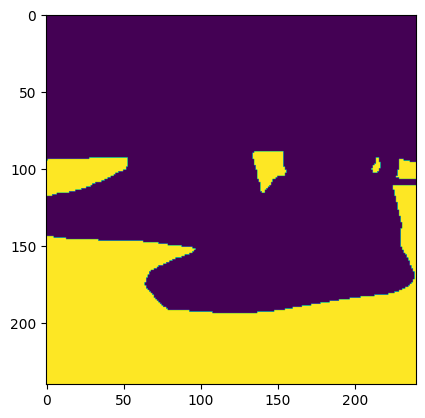

In [689]:
plt.imshow(mask)


In [611]:
type(mask)


numpy.ndarray

In [564]:
new_mask = mask
new_mask = new_mask.astype(np.uint8)

# Change from Bool to uint8

In [690]:
new_mask = mask.astype(np.uint8)

In [713]:
text_mask = [[1,2,3,4,5,6,7],[0,0,0,0,0,0,0],[0,0,1,1,1,0,0],[0,0,1,1,1,0,0],[0,0,1,1,1,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]]

In [714]:
new_mask = np.array(text_mask)

In [715]:
new_mask

array([[1, 2, 3, 4, 5, 6, 7],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [730]:
col = 6
for i in range(0,7):
    if (col-i) >= 0:
        print(new_mask[0,col-i])

7
6
5
4
3
2
1


In [704]:
new_mask.shape[0]

7

In [705]:
new_mask.shape[1]

7

# Put a Contour on the row side

In [691]:
for row in range(0, new_mask.shape[0]):
    print("")
    for col in range(0, new_mask.shape[1]-1):
        #print(new_mask[row,col],end='')
        #print(previous_pixel)
        if col != new_mask.shape[1]-1:
            next_pixel = new_mask[row,col+1]
        #print(" n:",row,",",col+1," ",next_pixel)
        print("[",new_mask[row,col],"-",next_pixel,"]",end='')
        if (new_mask[row,col] == 0) & (next_pixel == 1):
            new_mask[row,col] = 3
            print("change")
        if (new_mask[row,col] == 1) & (next_pixel == 0):
            print("change")
            new_mask[row,col+1] = 3
        



[ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ][ 0 - 0 ]

# put a contour on the column side

In [692]:
for col in range(0, new_mask.shape[1]):
    print("")
    for row in range(0, new_mask.shape[0]-1):
        print(new_mask[row,col],end='')
        #print(previous_pixel)
        if row != new_mask.shape[0]-1:
            next_pixel = new_mask[row+1,col]
        #print(" n:",row,",",col+1," ",next_pixel)
        print("[",new_mask[row,col],"-",next_pixel,"]",end='')
        if (new_mask[row,col] == 0) & ((next_pixel == 4) | (next_pixel == 1)):
            new_mask[row,col] = 3
            print("change")
        if ((new_mask[row,col] == 4) | (new_mask[row,col] == 1)) & (next_pixel == 0):
            print("change")
            new_mask[row+1,col] = 3


0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 0 ]0[ 0 - 3 ]3[ 3 - 1 ]1[ 1 - 1 ]1[ 1 - 1 ]1[ 1 - 1 ]1[ 1 - 1 ]1[ 1 - 1 

In [568]:
new_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# we need to change the backgrond from 0 to 2

In [693]:
for row in range(0, new_mask.shape[0]):
    for col in range(0, new_mask.shape[1]):
        if (new_mask[row,col] == 0):
            new_mask[row,col] = 2
        

In [570]:
new_mask

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

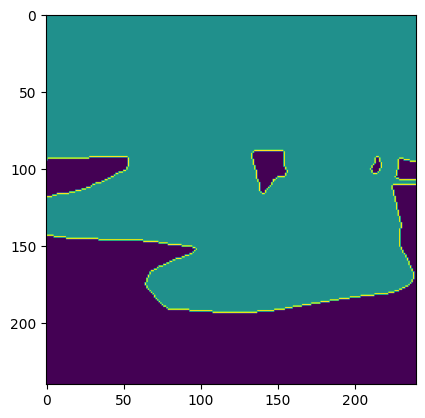

In [700]:
plt.imshow(new_mask)

# Save the best mask

In [34]:
#mask_image = (np.dstack((img, mask*0.5)) * 255).astype(np.uint8)  # Convert to uint8 format
#cv2.imwrite('1.png', mask_image)

True

In [46]:
mask_image = (mask * 255).astype(np.uint8)  # Convert to uint8 format
cv2.imwrite('0.png', mask_image)

True

In [695]:
mask_image = (new_mask).astype(np.uint8)  # Convert to uint8 format
cv2.imwrite('10.png', mask_image)

True

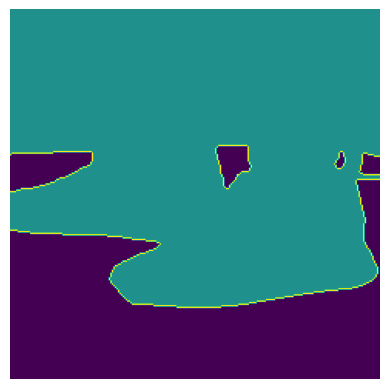

In [696]:
def display_target(target_array):
    normalized_array = (target_array.astype("uint8") - 1) * 127 
    plt.axis("off")
    plt.imshow(normalized_array[:, :])

#img = img_to_array(load_img(target_paths[0], color_mode="grayscale"))
display_target(new_mask)

# the second best mask

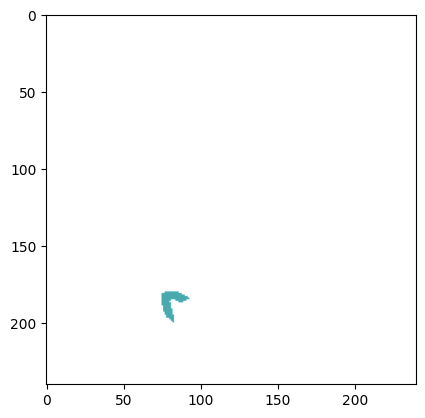

In [17]:
mask = sam_results[2]['segmentation']
img = np.ones((mask.shape[0], mask.shape[1], 3))
color_mask = np.random.random((1, 3)).tolist()[0]
for i in range(3):
    img[:,:,i] = color_mask[i]
    plt.imshow(np.dstack((img, mask*0.5)))

26
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


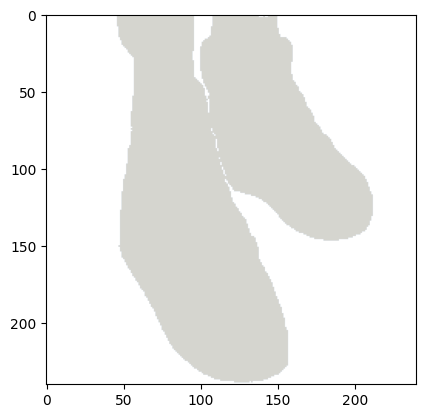

In [550]:
i = 1
for val in sam_results:
    #print(i)
    #print(val)
    i += 1
    mask = val['segmentation']
print(i)
print(mask)
img = np.ones((mask.shape[0], mask.shape[1], 3))
color_mask = np.random.random((1, 3)).tolist()[0]
for i in range(3):
    img[:,:,i] = color_mask[i]
    plt.imshow(np.dstack((img, mask*0.5)))

# find the best Image Mask

In [551]:
a = []
for val in sam_results:
    print((val['predicted_iou']))
    a.append(val['predicted_iou'])
ar = np.array(a)

1.0013147592544556
1.0004584789276123
0.9943219423294067
0.9912738800048828
0.9892617464065552
0.9871267676353455
0.9837144017219543
0.9795347452163696
0.9784476161003113
0.9783379435539246
0.9741489291191101
0.9641782641410828
0.9629586935043335
0.958235502243042
0.9562523365020752
0.9551913142204285
0.9548889398574829
0.9541319608688354
0.9422507882118225
0.9418777823448181
0.9379448294639587
0.927549421787262
0.9005914926528931
0.8974639773368835
0.8832989931106567


In [552]:
ar.max()

1.0013147592544556

In [553]:
np.argmax(ar)

0

In [554]:
ar[0]

1.0013147592544556

In [555]:
ar[np.argmax(ar)]

1.0013147592544556

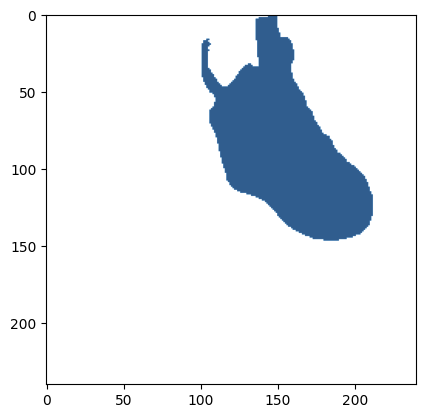

In [556]:
mask = sam_results[np.argmax(ar)]['segmentation']
img = np.ones((mask.shape[0], mask.shape[1], 3))
color_mask = np.random.random((1, 3)).tolist()[0]
for i in range(3):
    img[:,:,i] = color_mask[i]
    plt.imshow(np.dstack((img, mask*0.5)))

# Save the Best Image

In [198]:
mask_image = (np.dstack((img, mask*0.5)) * 255).astype(np.uint8)  # Convert to uint8 format
cv2.imwrite('0.png', mask_image)

True

In [199]:
mask_image = (np.dstack((img, mask*0.5)) * 255).astype(np.uint8)  # Convert to uint8 format
cv2.imwrite('0.png', mask_image)


True

In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Function that inputs the output and plots image and mask
def show_output(result_dict,axes=None):
     if axes:
        ax = axes
     else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
     sorted_result = sorted(result_dict, key=(lambda x: x['area']),      reverse=True)
     # Plot for each segment area
     for val in sorted_result:
        mask = val['segmentation']
        img = np.ones((mask.shape[0], mask.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
            ax.imshow(np.dstack((img, mask*0.5)))

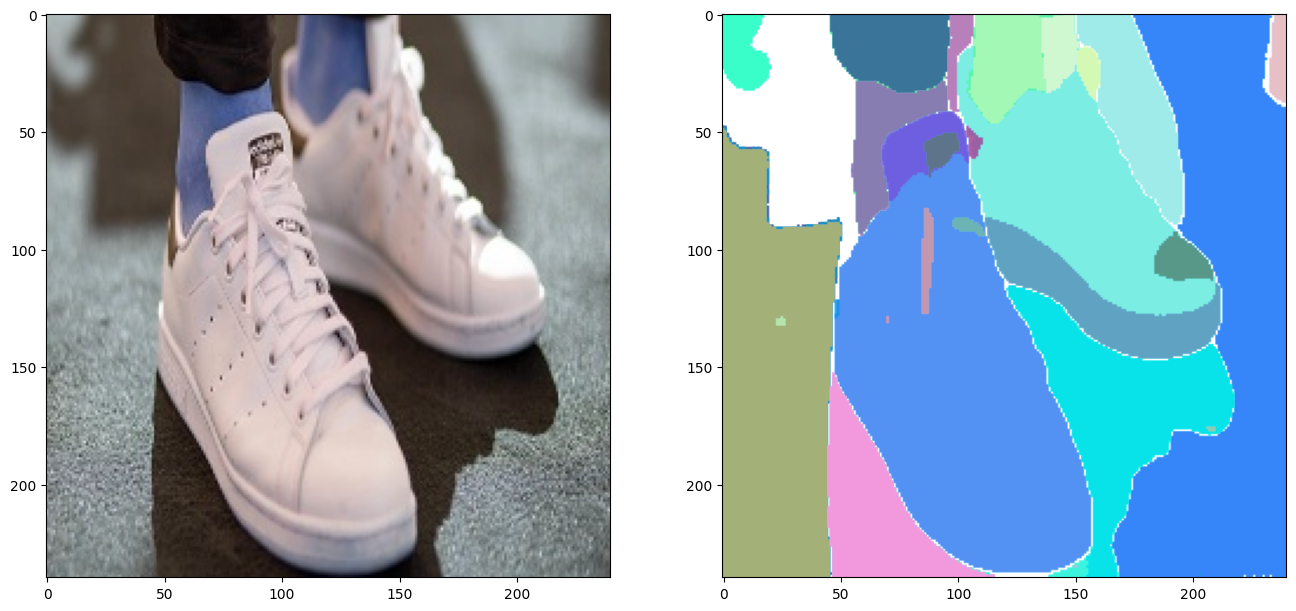

In [67]:
_,axes = plt.subplots(1,2, figsize=(16,16))
axes[0].imshow(image_rgb)
show_output(output_mask, axes[1])
#show_output(sam_result, axes[1])

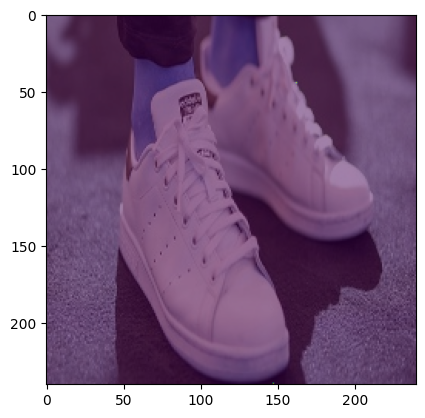

In [71]:
# Set up the SAM model with the encoded image
mask_predictor = SamPredictor(sam)
mask_predictor.set_image(image_rgb)

bbox_prompt = np.array([0,239, 239, 150, 50])

# Predict mask with bounding box prompt
masks, scores, logits = mask_predictor.predict(box=bbox_prompt,multimask_output=False)

masks, scores, logits = mask_predictor.predict(box=bbox_prompt,multimask_output=False)

# Plot the bounding box prompt and predicted mask
plt.imshow(image_rgb)
plt.imshow(masks[0], alpha=0.5)
#plt.gca().add_patch(plt.Rectangle((bbox_prompt[0], bbox_prompt[1]), bbox_prompt[2], bbox_prompt[3], fill=False, edgecolor='red', lw=2)) 
#show_mask(masks[0], plt.gca())
#show_box(bbox_prompt, plt.gca())
plt.show()